In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
    
    
%matplotlib inline

In [187]:
df = pd.read_csv('cardio_base.csv')

In [188]:
df2 = pd.read_csv('cardio_alco.csv')

In [189]:
df2.shape

(56903, 1)

In [190]:
#Split df2 into 22 columns
df2[['id', 'alco']]= df2['id;alco'].str.split(';', expand=True)

In [191]:
df2.head()

,id;alco,id,alco
0,44;0,44,0
1,45;0,45,0
2,46;0,46,0
3,47;0,47,0
4,49;0,49,0


In [192]:
df2.columns

Index(['id;alco', 'id', 'alco'], dtype='object')

In [193]:
df2.drop(['id;alco'], axis=1, inplace=True)

In [194]:
df2.id.unique()

array(['44', '45', '46', ..., '99951', '99952', '99954'], dtype=object)

In [195]:
##df2.rename(columns = {'id' :'alco', 'alco': 'id'}, inplace=True)

In [196]:
df2

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [197]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0          0  18393       2     168    62.0    110     80            1      0
1          1  20228       1     156    85.0    140     90            3      0
2          2  18857       1     165    64.0    130     70            3      0
3          3  17623       2     169    82.0    150    100            1      0
4          4  17474       1     156    56.0    100     60            1      0
...      ...    ...     ...     ...     ...    ...    ...          ...    ...
69995  99993  19240       2     168    76.0    120     80            1      1
69996  99995  22601       1     158   126.0    140     90            2      0
69997  99996  19066       2     183   105.0    180     90            3      0
69998  99998  22431       1     163    72.0    135     80            1      0
69999  99999  20540       1     170    72.0    120     80            2      0

[70000 rows x 9 columns]>

In [198]:
#Summary stats
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [199]:
df2['id'] = pd.to_numeric(df['id'])

In [200]:
df2['id'].dtype

dtype('int64')

In [201]:
#Merge the dataframes
df3 = pd.merge(df, df2, on='id', how='left')

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [202]:
df3['alco'].value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [205]:
#df3.to_csv('')

In [206]:
df3['age'] = (df3['age'] / 365).astype('int')

In [207]:
#There are only two unique values in Gender column
df3.gender.unique()

array([2, 1], dtype=int64)

In [208]:
#There are only two unique values in Smoke column
#Like inidcates a boolean value True/False 
df3.smoke.unique()

array([0, 1], dtype=int64)

In [209]:
df3['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [210]:
df_corr = df3.corr()
df_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,-0.047649
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


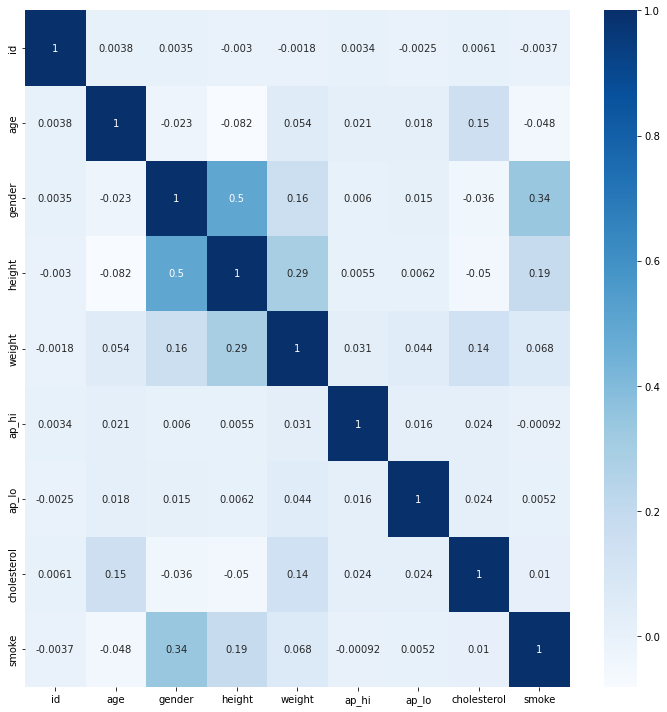

In [211]:
plt.figure(figsize=(10, 10))
sb.heatmap(df_corr, annot=True, cmap='Blues')
plt.tight_layout()

In [213]:
for i in list(df3.columns):
    print("{} ==> {}".format(i, df3[i].value_counts().shape[0]))

id ==> 70000
age ==> 28
gender ==> 2
height ==> 109
weight ==> 287
ap_hi ==> 153
ap_lo ==> 157
cholesterol ==> 3
smoke ==> 2
alco ==> 2


In [215]:
#Save DF to csv
df3.to_csv('cardio.csv', sep=',', encoding=)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50,2,168,62.0,110,80,1,0,0
1,1,55,1,156,85.0,140,90,3,0,0
2,2,51,1,165,64.0,130,70,3,0,0
3,3,48,2,169,82.0,150,100,1,0,0
4,4,47,1,156,56.0,100,60,1,0,0
